# Learning Analysis

The purpose of this notebook is to document results from training

## Preamble

In [1]:
import pandas as pd
import dill
from collections import Counter
from matplotlib import pyplot as plt

### Helper Functions

In [2]:
def calc_win_percentage(winner_list, creatures):
    total_games_played = len(winner_list)
    counts = Counter(winner_list)
    win_percentages = {creature: num_wins/total_games_played for creature, num_wins in counts.items()}
    for creature in creatures:
        if creature not in win_percentages.keys():
            win_percentages[creature] = 0
    return win_percentages

### Load Data

## Method Analysis

### Random

Number of games played: 37700


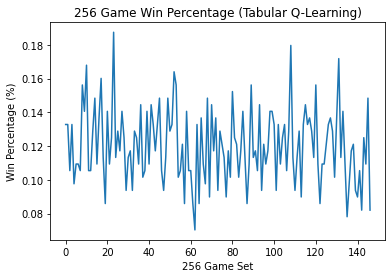

{'Strahd': 0.8797347480106101, 'Leotris': 0.12026525198938992}

In [94]:
batch_size = 256
leotris_win_pct = list()

winner_list = dill.load(open("results/winner_list_random.pickle", "rb"))
print("Number of games played: {}".format(len(winner_list)))

for i in range(0, len(winner_list) -
               batch_size, batch_size):
    batch_winner_list = winner_list[i:(i+batch_size)]
    win_pct = calc_win_percentage(batch_winner_list, creatures=["Leotris", "Strahd"])
    leotris_win_pct.append(win_pct["Leotris"])
    
plt.plot(range(len(leotris_win_pct)), leotris_win_pct)
plt.title("{} Game Win Percentage (Tabular Q-Learning)".format(batch_size))
plt.ylabel("Win Percentage (%)")
plt.xlabel("{} Game Set".format(batch_size))
plt.show()

calc_win_percentage(winner_list, creatures=['Leotris', 'Strahd'])

### Ranged Aggression

Number of games played: 12000


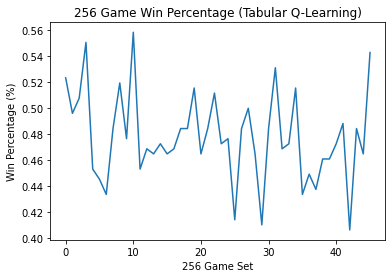

{'Strahd': 0.5225, 'Leotris': 0.4775}

In [92]:
batch_size = 256
leotris_win_pct = list()

winner_list = dill.load(open("results/winner_list_ranged_aggression.pickle", "rb"))
print("Number of games played: {}".format(len(winner_list)))

for i in range(0, len(winner_list) - batch_size, batch_size):
    batch_winner_list = winner_list[i:(i+batch_size)]
    win_pct = calc_win_percentage(batch_winner_list, creatures=["Leotris", "Strahd"])
    leotris_win_pct.append(win_pct["Leotris"])
    
plt.plot(range(len(leotris_win_pct)), leotris_win_pct)
plt.title("{} Game Win Percentage (Tabular Q-Learning)".format(batch_size))
plt.ylabel("Win Percentage (%)")
plt.xlabel("{} Game Set".format(batch_size))
plt.show()

calc_win_percentage(winner_list, creatures=['Leotris', 'Strahd'])

### Tabular Q-Learning

Number of games played: 7100


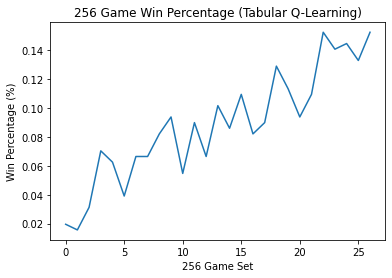

{'Strahd': 0.9094366197183099, 'Leotris': 0.09056338028169014}

In [89]:
batch_size = 256
leotris_win_pct = list()

winner_list = dill.load(open("results/winner_list_q_tabular.pickle", "rb"))
print("Number of games played: {}".format(len(winner_list)))

for i in range(0, len(winner_list) - batch_size, batch_size):
    batch_winner_list = winner_list[i:(i+batch_size)]
    win_pct = calc_win_percentage(batch_winner_list, creatures=["Leotris", "Strahd"])
    leotris_win_pct.append(win_pct["Leotris"])
    
plt.plot(range(len(leotris_win_pct)), leotris_win_pct)
plt.title("{} Game Win Percentage (Tabular Q-Learning)".format(batch_size))
plt.ylabel("Win Percentage (%)")
plt.xlabel("{} Game Set".format(batch_size))
plt.show()

calc_win_percentage(winner_list, creatures=['Leotris', 'Strahd'])

## Linear Function Approximation

Number of games played: 67600


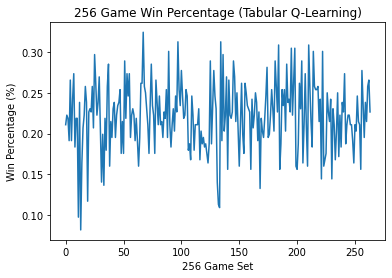

{'Leotris': 0.22146449704142013, 'Strahd': 0.7785355029585799}

In [90]:
batch_size = 256
leotris_win_pct = list()

winner_list = dill.load(open("results/winner_list_linear_function_approximation.pickle", "rb"))
print("Number of games played: {}".format(len(winner_list)))

for i in range(0, len(winner_list) - batch_size, batch_size):
    batch_winner_list = winner_list[i:(i+batch_size)]
    win_pct = calc_win_percentage(batch_winner_list, creatures=["Leotris", "Strahd"])
    leotris_win_pct.append(win_pct["Leotris"])
    
plt.plot(range(len(leotris_win_pct)), leotris_win_pct)
plt.title("{} Game Win Percentage (Tabular Q-Learning)".format(batch_size))
plt.ylabel("Win Percentage (%)")
plt.xlabel("{} Game Set".format(batch_size))
plt.show()

calc_win_percentage(winner_list, creatures=['Leotris', 'Strahd'])

### DQN

Number of games played: 16400


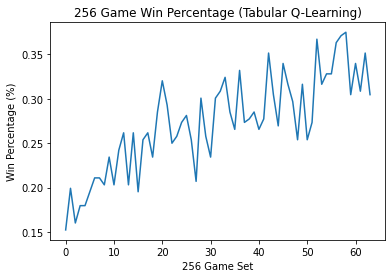

{'Strahd': 0.7266463414634147, 'Leotris': 0.2733536585365854}

In [109]:
batch_size = 256
leotris_win_pct = list()

winner_list = dill.load(open("results/winner_list_DQN.pickle", "rb"))
print("Number of games played: {}".format(len(winner_list)))

for i in range(0, len(winner_list) - batch_size, batch_size):
    batch_winner_list = winner_list[i:(i+batch_size)]
    win_pct = calc_win_percentage(batch_winner_list, creatures=["Leotris", "Strahd"])
    leotris_win_pct.append(win_pct["Leotris"])
    
plt.plot(range(len(leotris_win_pct)), leotris_win_pct)
plt.title("{} Game Win Percentage (Tabular Q-Learning)".format(batch_size))
plt.ylabel("Win Percentage (%)")
plt.xlabel("{} Game Set".format(batch_size))
plt.show()

calc_win_percentage(winner_list, creatures=['Leotris', 'Strahd'])